In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import bisect
import statistics

from helper import *

# Project 3

## Keyword Spotting in historical documents with dynamic time warping

### Wicht François-Xavier, Demont Antoine, Mottet Boris, Poplawski Martin, Carrel Vincent

## The DTW measure seems quite unreliable as it is now

Train Validation

In [2]:
h = open("data/task/train.txt", "r")
trainDocs = []
for line in h:
    trainDocs.append(line.strip())
h.close()
print(f"Training docs: {trainDocs}")


h = open("data/task/valid.txt", "r")
valDocs = []
for line in h:
    valDocs.append(line.strip())
h.close()
print(f"Validation docs: {valDocs}")

Training docs: ['270', '271', '272', '273', '274', '275', '276', '277', '278', '279']
Validation docs: ['300', '301', '302', '303', '304']


## Getting words

In [3]:
words = {} 

#ids, frames = Slicer(images=("./data/images", ".jpg"),frames=("./data/ground-truth/locations", ".svg")).get_frames(save=True, savepath="./data/output/")

h = open("data/ground-truth/transcription.txt", "r")
for line in h: 
    for doc in trainDocs: 
        if not line.startswith(doc):
            continue
        image, word = line.split()
        image = np.array(Image.open("data/output/" + doc + "/" + image + ".png"),dtype=float) 
        if not word in words:
            words[word] = []
        words[word] = words[word] + [image]
# print(words)

In [4]:
# Find the threshhold where everything would be classified correctly in the training set. 
# This Threshhold is not well calculated 

# Calculated on the same word and only 5 times..
# Then we take the mean and add half a std to it. 

dtw_values = {}
counter = 0

for images in words: 
    dtw_values[images] = []
    print(counter)
    print("-----")
    counter += 1
    occurrences = 0
    for i in range(len(words[images])):
        for j in range(i + 1, len(words[images])):
            if occurrences > 5:
                break
            dtw_values[images] = dtw_values[images] + [(compute_dtw(words[images][i], words[images][j]))]                                    
            occurrences += 1
            

for key in dtw_values:
    values = dtw_values[key]
    if len(values) > 0:
        #TODO Find a better threshhold
        print(values)
        mean = statistics.mean(values)
        dtw_values[key] = mean
        
        #Tried maxValue but it is to lenient
        #maxVal = max(values)
        #dtw_values[key] = maxVal
    else: 
        
        #TODO What to do with words that have only 1 image?
        dtw_values[key] = 150
    
print(dtw_values)
            
#threshhold = np.array(dtw_values).mean() + np.array(dtw_values).std()/2
#print(threshhold)
#print(type(threshhold))

0
-----
1
-----
2
-----
3
-----
4
-----
5
-----
6
-----
7
-----
8
-----
9
-----
10
-----
11
-----
12
-----
13
-----
14
-----
15
-----
16
-----
17
-----
18
-----
19
-----
20
-----
21
-----
22
-----
23
-----
24
-----
25
-----
26
-----
27
-----
28
-----
29
-----
30
-----
31
-----
32
-----
33
-----
34
-----
35
-----
36
-----
37
-----
38
-----
39
-----
40
-----
41
-----
42
-----
43
-----
44
-----
45
-----
46
-----
47
-----
48
-----
49
-----
50
-----
51
-----
52
-----
53
-----
54
-----
55
-----
56
-----
57
-----
58
-----
59
-----
60
-----
61
-----
62
-----
63
-----
64
-----
65
-----
66
-----
67
-----
68
-----
69
-----
70
-----
71
-----
72
-----
73
-----
74
-----
75
-----
76
-----
77
-----
78
-----
79
-----
80
-----
81
-----
82
-----
83
-----
84
-----
85
-----
86
-----
87
-----
88
-----
89
-----
90
-----
91
-----
92
-----
93
-----
94
-----
95
-----
96
-----
97
-----
98
-----
99
-----
100
-----
101
-----
102
-----
103
-----
104
-----
105
-----
106
-----
107
-----
108
-----
109
-----
110
-----


In [5]:
#Check the closest images to the testing image
#Everything is done only on the validation set here

def validate(trained, valid, trainedLabels, validLabels, threshold):
    total = len(valid)
    counter = 0
    stats = {}
    for i in range(len(valid)):
        print(f"{counter}/{total}")
        counter += 1
        results = [] 
        true_positive = 0
        false_positive = 0
        
        results = [(compute_dtw(valid[i], trained[j]), trainedLabels[j]) for j in range(len(trained))]
        results = sorted(results)
        print(validLabels[i])
        if validLabels[i] in threshold.keys():
            index = bisect.bisect([list(k) for k in zip(*results)][0], threshold[validLabels[i]])
        else:
            print("No matches")
            stats[validLabels[i]] = (true_positive,false_positive)
            continue
        print(f"True label is: {validLabels[i]}")
        print(f"Found following matches:")
        for idx in range(index):
            _,noun = results[idx]
            print(results[idx])
            if noun == validLabels[i]:
                true_positive += 1 
            else:
                false_positive += 1 
        stats[validLabels[i]] = (true_positive,false_positive)
    
    return stats
    

In [6]:
valImages = []
valLabels = []
trainImages = []
trainLabels = []

#TODO Only use the words that are in train and valid, those are in the task/keywords.txt 
h = open("data/ground-truth/transcription.txt", "r")
for line in h: 
    for doc in valDocs: 
        if not line.startswith(doc):
            continue
        image, word = line.split()
        image = np.array(Image.open("data/output/" + doc + "/" + image + ".png"),dtype=float) 
        valImages.append(image)
        valLabels.append(word)
        
        
h = open("data/ground-truth/transcription.txt", "r")
for line in h: 
    for doc in trainDocs: 
        if not line.startswith(doc):
            continue
        image, word = line.split()
        image = np.array(Image.open("data/output/" + doc + "/" + image + ".png"),dtype=float) 
        trainImages.append(image)
        trainLabels.append(word)



stats = validate(trainImages[:100], valImages[:100], trainLabels, valLabels, dtw_values)

0/100
s_3-s_0-s_0-s_pt
No matches
1/100
L-e-t-t-e-r-s-s_cm
True label is: L-e-t-t-e-r-s-s_cm
Found following matches:
(175.20198905629738, 'L-e-t-t-e-r-s-s_cm')
(185.08620970506345, 'S-e-l-l-a-r-s')
2/100
O-r-d-e-r-s
True label is: O-r-d-e-r-s
Found following matches:
(154.50846737433758, 'O-r-d-e-r-s')
(165.6513539844034, 'O-r-d-e-r-s')
(169.58306844247144, 't-w-e-l-v-e')
3/100
a-n-d
True label is: a-n-d
Found following matches:
(108.64963311188886, 'a-n-d')
(118.68800554849658, 'a-n-d')
(182.75179454701936, 'a-t')
(208.0019636544939, 'a-t')
(214.81626187603425, 'a-b-o-u-t')
4/100
I-n-s-t-r-u-c-t-i-o-n-s-s_pt
True label is: I-n-s-t-r-u-c-t-i-o-n-s-s_pt
Found following matches:
(193.56328102216182, 'I-n-s-t-r-u-c-t-i-o-n-s-s_pt')
5/100
D-e-c-e-m-b-e-r
No matches
6/100
s_1-s_7-s_5-s_5-s_pt
True label is: s_1-s_7-s_5-s_5-s_pt
Found following matches:
7/100
H-o-g-g-s_qt-s
True label is: H-o-g-g-s_qt-s
Found following matches:
8/100
C-o-m-p-a-n-y-s_cm
True label is: C-o-m-p-a-n-y-s_cm
Foun

Accuracy: 9.02 %


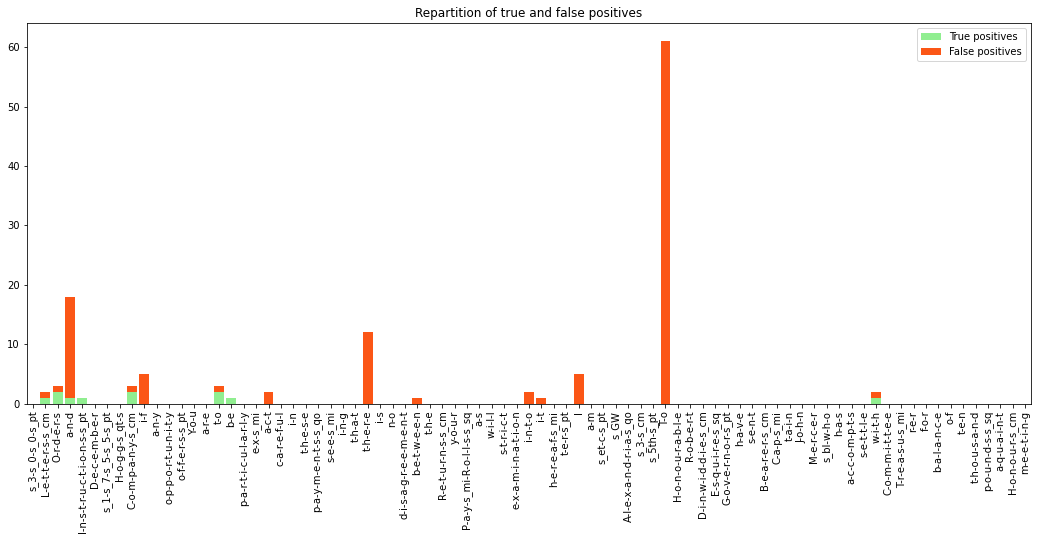

Recall: 1.29 %


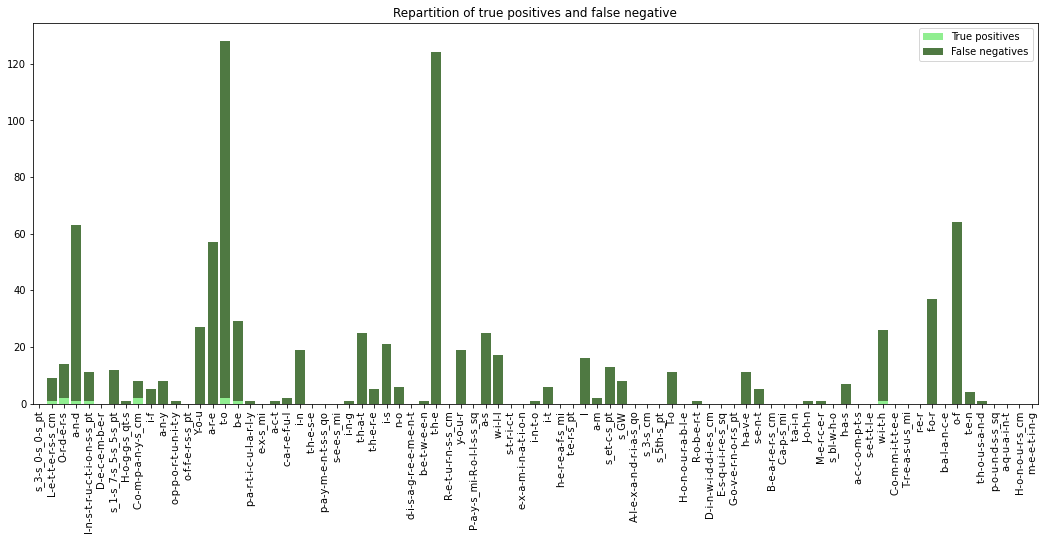

In [12]:
#print(stats)
true_positives = []
false_positives = []
relevent_elements = []
for s in stats:
    tp,fp = stats[s]
    true_positives.append(tp)
    false_positives.append(fp)
    if s in words.keys():
        relevent_elements.append(len(words[s]))
    else :
        relevent_elements.append(0)
accuracy = sum(true_positives)/(sum(true_positives)+sum(false_positives))
recall = sum(true_positives)/sum(relevent_elements)
false_negatives = [relevent_elements[i] - true_positives[i] for i in range(len(relevent_elements))]
print(f'Accuracy: {round(accuracy*100,2)} %')

plt.figure(figsize=(18,7))
plt.xticks(rotation=90)
plt.bar(stats.keys(), true_positives, label='True positives', color='#90EE90')
plt.bar(stats.keys(), false_positives, bottom=true_positives, label='False positives', color='#FB5616')
plt.margins(x=0.001)
plt.legend()
plt.title('Repartition of true and false positives')
plt.show()

print(f'Recall: {round(recall*100,2)} %')

plt.figure(figsize=(18,7))
plt.xticks(rotation=90)
plt.bar(stats.keys(), true_positives, label='True positives', color='#90EE90')
plt.bar(stats.keys(), false_negatives, bottom=true_positives, label='False negatives', color='#4F7942')
plt.margins(x=0.001)
plt.legend()
plt.title('Repartition of true positives and false negative')
plt.show()

In [8]:
h = open("data/ground-truth/transcription.txt", "r")
keywords = open("data/task/keywords.txt", "r")

l1 = []
l2 = []
for line in keywords:
    l1.append(line[:-1])
    
for line in h: 
    for doc in valDocs: 
        if not line.startswith(doc):
            continue
        image, word = line.split()
        l2.append(word)
    
list(set(l1).intersection(l2))

['t-h-i-n-g-s',
 's-e-n-d',
 'd-a-y',
 'p-l-a-c-e',
 'm-e-n',
 'w-a-n-t-e-d',
 't-w-e-l-v-e',
 'h-u-n-d-r-e-d',
 's_GW',
 'o-r-d-e-r',
 'R-e-c-r-u-i-t-s',
 'd-e',
 'o-p-p-o-r-t-u-n-i-t-y',
 's_et-c-s_pt',
 'r-e-c-e-i-v-e',
 'C-o-l-o-n-e-l',
 'R-o-b-e-r-t',
 'm-a-d-e',
 'F-o-r-t',
 'O-f-f-i-c-e-r-s',
 'L-e-t-t-e-r-s',
 'w-a-n-t-i-n-g',
 'J-o-h-n',
 'o-r-d-e-r-e-d',
 'M-r-s_pt',
 'l-e-f-t',
 'V-i-r-g-i-n-i-a',
 'C-a-p-t-a-i-n',
 'O-r-d-e-r-s',
 'I-n-s-t-r-u-c-t-i-o-n-s-s_pt',
 'M-a-j-o-r',
 'c-a-r-e-f-u-l',
 'R-e-g-i-m-e-n-t',
 'C-u-m-b-e-r-l-a-n-d',
 'g-r-e-a-t-l-y']